# MNIST Digit Recognition
Dense Network:
- Input Layer (28x28, flattened)
- Dense Layer (512 nodes, ReLU)
  - Dropout (0.2)
- Dense Layer (10 nodes, softmax)

Training Parameters:
- Optimizer: Adam [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980v8)
- Loss: Sparse Categorical Crossentropy 
- Metric: Accuracy

Training Data: 
- MNIST Digits (from [tf.keras.datasets](https://www.tensorflow.org/versions/r1.14/api_docs/python/tf/keras/datasets))
- Handwritten digits, 28 x 28 pixel grayscale images

In [30]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Describe the model, usefully:

In [35]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


Summary of the layers:
- `Flatten` is the input (28x28 image as 784 data points)
- `Dense` is the hidden layer (densely connected... e.g. all 784 of input connect to all 512 nodes)
- `Dropout` randomly sets some outputs to 0, to prevent over-fitting ([link](https://keras.io/api/layers/regularization_layers/dropout/))
- `Dense_5` is the output layer, with predictions (as decimals) of which 10 digits an input is

In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Next we train the model using sets of images (`x_train`) and labels (`y_train`), and updating the model weights to improve the predictions:

In [37]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2181 - accuracy: 0.9355
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0976 - accuracy: 0.9708
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0699 - accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0525 - accuracy: 0.9830
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0445 - accuracy: 0.9855


Evaluate the model with a different set of images and labels (`x_test` and `y_test`) not from the training data. See what the loss and accuracy is across the test data set.

In [38]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 901us/step - loss: 0.0697 - accuracy: 0.9787


[0.06968611478805542, 0.9786999821662903]

Lets manually classify a single image

In [13]:
print(x_test[0][12])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.08627451
 0.91372549 1.         0.3254902  0.         0.         0.
 0.         0.         0.         0.        ]


In [ ]:
print(y_test)

Displaying digit

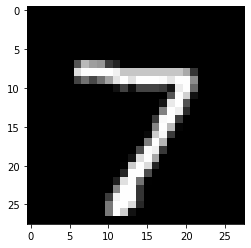

In [21]:
import matplotlib.pyplot as plt
digit = x_test[0].reshape([28, 28]);
plt.gray()
plt.imshow(digit)

In [28]:
prediction=model.predict(x_test[0].reshape([1, 28, 28]))

In [29]:
print(prediction)

[[2.4143365e-10 5.1021168e-08 7.0451898e-07 1.2550507e-05 1.2439071e-12
  1.3912328e-08 3.5076630e-14 9.9998653e-01 2.0497410e-09 1.1187749e-07]]


In [26]:
import numpy as np
print(np.argmax(prediction))

7


Todo: 
- Draw your own hand written digit. Resize it to 28 x 28 pixels black and white. Upload to this notebook and see what you get for the prediction.